### Definição:

O medelo a seguir construirá uma analise de padrões comportamentais do usuário móvel de smartfone.

### Sobre os dados:

| Variavel | Especificação | Tipo |
|:---:|:---:|:---:|
| User ID | Identificador exclusivo para cada usuário. | int |
| Device Model | Modelo do smartphone do usuário. | object |
| Operating System | O sistema operacional do dispositivo (iOS ou Android). | object |
| App Usage Time (min/day) | tempo diário gasto em aplicativos móveis, medido em minutos. | int |
| Screen On Time (hours/day) | média de horas por dia em que a tela fica ativa. | float |
| Battery Drain (mAh/day) | consumo diário de bateria em mAh. | int |
| Number of Apps Installed | total de aplicativos disponíveis no dispositivo. | int |
| Data Usage (MB/day) | consumo diário de dados móveis em megabytes. | int |
| Age | Idade do usuário. | int |
| Gender | Gênero do usuário (masculino ou feminino). | object |
| User Behavior Class | Classificação do comportamento do usuário com base em padrões de uso (1 a 5). | int |

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [104]:
df = pd.read_csv('user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [108]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


<Axes: xlabel='Device Model', ylabel='count'>

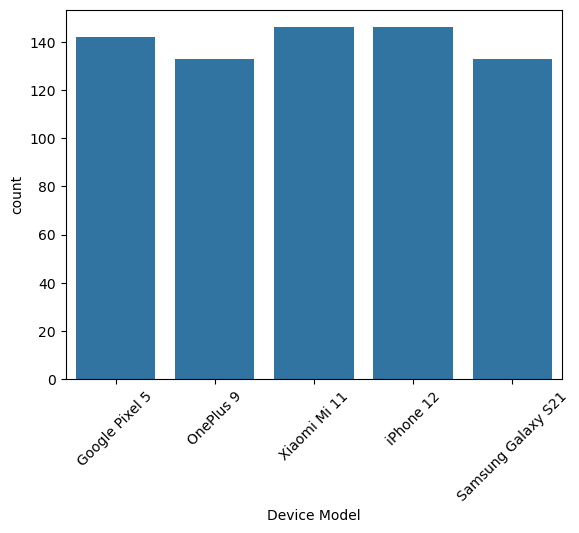

In [110]:
plt.xticks(rotation=45)
sns.countplot(df, x='Device Model')

<Axes: xlabel='Operating System', ylabel='count'>

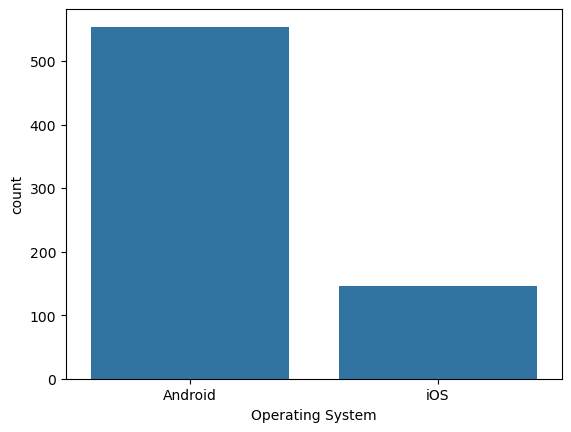

In [124]:
sns.countplot(df, x='Operating System')

<Axes: xlabel='Age', ylabel='Count'>

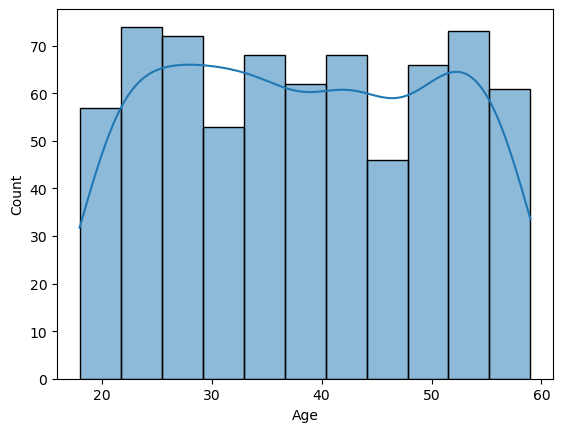

In [126]:
sns.histplot(df['Age'], kde=True)

<Axes: xlabel='Gender', ylabel='count'>

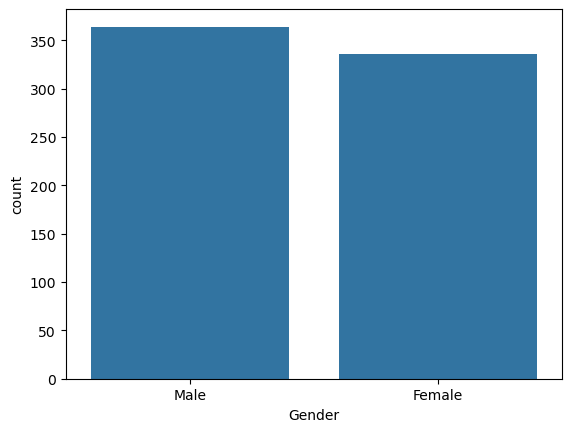

In [128]:
sns.countplot(df, x='Gender')

In [112]:
data = pd.get_dummies(df, columns=['Device Model', 'Operating System', 'Gender'], drop_first=True)
data

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,1,393,6.4,1872,67,1122,40,4,False,False,False,False,False,True
1,2,268,4.7,1331,42,944,47,3,True,False,False,False,False,False
2,3,154,4.0,761,32,322,42,2,False,False,True,False,False,True
3,4,239,4.8,1676,56,871,20,3,False,False,False,False,False,True
4,5,187,4.3,1367,58,988,31,3,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,2,False,False,False,True,True,True
696,697,316,6.8,1965,68,1201,59,4,False,False,True,False,False,True
697,698,99,3.1,942,22,457,50,2,False,False,False,False,False,False
698,699,62,1.7,431,13,224,44,1,False,True,False,False,False,True


In [114]:
y = data['User Behavior Class']
y = y - 1
X = data.drop(columns='User Behavior Class')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

In [116]:
modelo = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, radom_state=45).fit(X_train, y_train)

In [118]:
y_pred = modelo.predict(X_test)

In [120]:
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print(f"Classificação: {classification}")
print(f"Matriz de confusão:")
print(cm)

Acurácia: 0.99
Classificação:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.98        30
           2       1.00      0.98      0.99        43
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        30

    accuracy                           0.99       175
   macro avg       0.99      1.00      0.99       175
weighted avg       0.99      0.99      0.99       175

Matriz de confusão:
[[36  0  0  0  0]
 [ 0 30  0  0  0]
 [ 0  1 42  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 30]]


In [122]:
predict = {
    'y_test': y_test,
    'y_pred': y_pred
}

predict = pd.DataFrame(predict)
predict

,y_test,y_pred
418,2,2
51,2,2
331,1,1
101,2,2
410,4,4
...,...,...
670,0,0
612,4,4
365,3,3
422,3,3
